In [1]:
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.offline import iplot
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [2]:
path = r"/Users/coulson/Desktop/6893bigdata/6893BigData/model_train/match_data.csv"
df = pd.read_csv(path)

print('Total entrances:', df.shape[0], '.')
print('Total fields for each entrance:', df.shape[1], '.')

Total entrances: 112809 .
Total fields for each entrance: 61 .


In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,4827269461,1699731406894,1509,13,2,2,0,0,1,2,2,80,4,14,203,11,4,134,12,4,429,4,3,12,4,14,4,0,1,1,1,28,16,84,-1,-1,266,4,12,121,4,11,55,12,14,50,7,4,267,14,4,5,0,0,3,1,200.0,24.0,238.0,517.0,233.0
1,4831370335,1700108360998,2125,13,2,2,0,2,2,1,2,36,6,12,33,6,11,61,4,12,96,6,4,902,4,7,0,0,0,2,0,91,80,233,53,266,24,12,4,64,4,11,517,4,12,221,4,6,497,4,14,11,3,2,3,2,-1.0,53.0,516.0,68.0,-1.0
2,4820743231,1699143215353,1880,13,2,1,2,2,1,2,1,86,14,4,113,4,11,147,4,12,17,14,4,497,4,3,4,0,1,0,1,238,145,164,43,203,68,14,4,141,11,4,84,14,4,119,1,4,555,14,4,8,1,0,4,1,157.0,897.0,90.0,164.0,203.0
3,4826327830,1699652621639,2397,13,2,1,1,1,1,2,2,114,4,12,421,11,4,112,4,12,51,3,4,16,7,4,9,3,1,1,0,54,119,53,59,91,266,12,4,63,4,11,8,6,4,360,4,1,111,14,4,7,1,2,5,1,555.0,43.0,11.0,90.0,39.0
4,4829806625,1699943934236,912,13,2,2,0,0,0,2,2,86,14,4,32,4,11,75,12,4,22,7,4,412,4,14,0,0,0,0,0,119,517,360,-1,266,897,12,4,59,11,4,777,4,12,51,4,1,99,4,7,5,0,0,2,1,53.0,122.0,12.0,141.0,203.0


In [4]:
print('Total of missing values found:', df.isna().sum().sum(), '.')

Total of missing values found: 20 .


In [5]:
df.describe()


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,1.128090e+05,1.128090e+05,112809.000000,112809.0,112809.000000,112809.00000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112809.000000,112805.000000,112805.000000,112805.00000,112805.000000,112805.000000
mean,4.834812e+09,1.700443e+12,1601.713152,13.0,1.510536,1.47373,1.101588,1.171077,1.039846,1.441490,1.411031,222.983698,7.932266,8.305525,154.781622,7.709748,7.668289,189.881561,7.819332,8.111773,179.672216,5.185021,5.262187,242.515021,7.379553,7.618772,5.108848,0.783634,0.460770,1.579457,0.902942,195.498958,196.192343,195.932771,196.671746,198.816779,218.078256,7.913872,8.296324,154.754426,7.708720,7.679529,190.926859,7.789095,8.115735,180.194896,5.170146,5.229680,242.098609,7.359457,7.638096,5.208822,0.804466,0.498444,1.782757,0.769380,196.094349,195.426488,195.35252,196.174655,200.286982
std,3.779264e+07,9.515582e+08,459.488208,0.0,0.499891,0.52791,0.785523,0.763999,0.817487,0.621019,0.558039,273.725715,4.168229,4.212498,176.742164,3.552297,3.565690,220.313488,4.359839,4.406884,182.923175,2.842686,2.925284,244.104047,4.637186,4.692754,3.622535,1.099675,0.652418,1.311624,0.765349,233.104199,234.980647,234.372476,237.655484,241.898030,270.908588,4.168576,4.212770,176.867265,3.559149,3.570938,221.067447,4.357172,4.397467,182.746600,2.844145,2.911221,244.277405,4.620410,4.692061,3.660989,1.103826,0.673263,1.355127,0.745339,233.871970,233.833321,235.20423,235.677088,244.467303
min,1.454148e+09,1.690726e+12,100.000000,13.0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,4.829880e+09,1.699950e+12,1319.000000,13.0,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,56.000000,4.000000,4.000000,59.000000,4.000000,4.000000,61.000000,4.000000,4.000000,63.000000,4.000000,4.000000,51.000000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,53.000000,53.000000,53.000000,53.000000,53.000000,54.000000,4.000000,4.000000,59.000000,4.000000,4.000000,61.000000,4.000000,4.000000,63.000000,4.000000,4.000000,51.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,53.000000,53.000000,53.00000,53.000000,53.000000
50%,4.834816e+09,1.7004

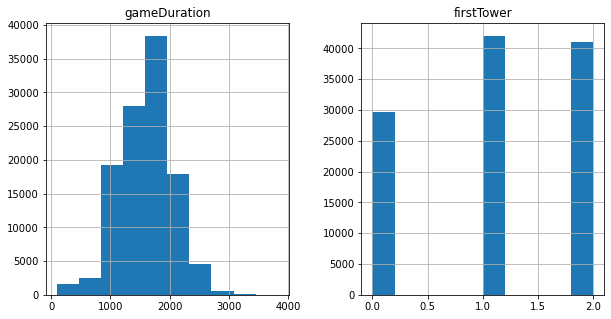

In [6]:
df[['gameDuration', 'firstTower']].hist(figsize=(10,5))
plt.show()

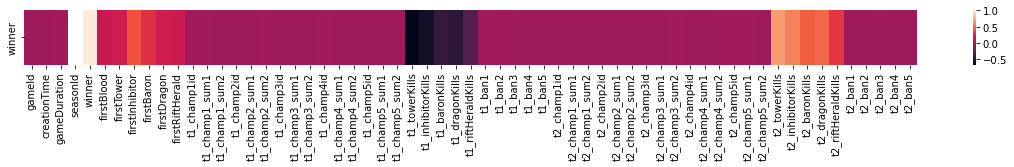

In [7]:
winner_correlation = df.corr()['winner'].to_frame().T 
plt.subplots(figsize=(20, 1))
sns.heatmap(winner_correlation)
plt.show()

In [8]:
abs_winner_correlation = winner_correlation.abs()

abs_winner_correlation.sort_values(by='winner', axis=1, ascending=False)

,winner,t2_towerKills,t1_towerKills,t2_inhibitorKills,t1_inhibitorKills,t2_dragonKills,t1_dragonKills,t2_baronKills,t1_baronKills,firstInhibitor,t2_riftHeraldKills,t1_riftHeraldKills,firstBaron,firstDragon,firstTower,firstRiftHerald,firstBlood,t1_ban2,gameDuration,t2_champ4id,t1_champ5id,t1_champ1_sum2,t2_ban3,t1_champ4id,t2_champ5id,t1_champ2_sum1,t1_ban1,t1_champ1_sum1,t1_champ5_sum1,t1_ban3,t1_champ3_sum2,t2_champ3_sum1,t2_champ2id,t1_champ1id,t2_champ4_sum2,t2_ban2,t1_champ4_sum1,t2_champ3id,t2_champ1id,gameId,t2_champ5_sum1,t1_champ2_sum2,t2_champ3_sum2,t1_champ2id,t2_champ2_sum2,t1_ban5,t2_champ2_sum1,t2_champ1_sum1,t2_champ1_sum2,t1_ban4,creationTime,t1_champ3id,t1_champ5_sum2,t2_ban5,t1_champ3_sum1,t2_ban1,t1_champ4_sum2,t2_champ4_sum1,t2_ban4,t2_champ5_sum2,seasonId
winner,1.0,0.664508,0.65962,0.571491,0.569802,0.474296,0.471653,0.44126,0.429565,0.402551,0.301447,0.295235,0.282414,0.185872,0.181463,0.172122,0.162866,0.010736,0.00962,0.008159,0.007532,0.007346,0.00721,0.007179,0.007115,0.006817,0.006458,0.005743,0.00531,0.005264,0.004943,0.004596,0.003742,0.003462,0.00307,0.002926,0.00285,0.002107,0.002081,0.001993,0.001991,0.001896,0.001816,0.001061,0.001003,0.000711,0.000636,0.000623,0.000598,0.000511,0.000481,0.00023,0.000227,0.000184,0.000176,0.000175,0.00017,0.000117,0.000055,0.00005,NaN


In [9]:
correlation_threshold = 0.29

# According to the correlation values, we filter the useful attributes.
attributes = list(filter(lambda x: abs(float(winner_correlation[x])) > correlation_threshold, df.columns))

In [10]:
attributes

['winner',
 'firstInhibitor',
 't1_towerKills',
 't1_inhibitorKills',
 't1_baronKills',
 't1_dragonKills',
 't1_riftHeraldKills',
 't2_towerKills',
 't2_inhibitorKills',
 't2_baronKills',
 't2_dragonKills',
 't2_riftHeraldKills']

In [11]:
dropped_df = df[attributes]

In [12]:
dropped_df.shape

(112809, 12)

In [13]:
X = dropped_df.drop(labels=['winner'], axis=1)
y = dropped_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [14]:
X_test.shape

(11281, 11)

In [15]:
import multiprocessing

# Get the number of cores available
num_cores = multiprocessing.cpu_count()

print(f'Number of available cores: {num_cores}')


Number of available cores: 10


In [16]:
k = 10

In [17]:
# We define the parameters we want to try.
parameters = dict()
parameters['splitter'] = ['best', 'random']
parameters['max_depth'] = range(1, len(attributes))
parameters['criterion'] = ['gini', 'entropy']

In [18]:
decision_tree = DecisionTreeClassifier()

# We search for the best combination of the parameters.
grid_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=k, n_jobs=-1)
grid_decision_tree.fit(X_train, y_train)

print("Best parameters: ", grid_decision_tree.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


In [19]:
decision_tree = DecisionTreeClassifier(**grid_decision_tree.best_params_)

decision_tree = decision_tree.fit(X_train, y_train)

In [20]:
y_pred = decision_tree.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 96.3 %


In [21]:
dump(decision_tree, 'trained_models/decision_tree_model.joblib')

['trained_models/decision_tree_model.joblib']

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
logistic_model = LogisticRegression(max_iter=1000)  # max_iter may need to be increased if convergence is not reached

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 94.69 %


In [24]:
dump(logistic_model, 'trained_models/logistic_model.joblib')

['trained_models/logistic_model.joblib']

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [26]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print('Random Forest Accuracy:', accuracy_rf, '%')
dump(random_forest_model, 'trained_models/random_forest_model.joblib')

Random Forest Accuracy: 96.37 %


['trained_models/random_forest_model.joblib']

In [27]:
# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print('Naive Bayes Accuracy:', accuracy_nb, '%')
dump(naive_bayes_model, 'trained_models/naive_bayes_model.joblib')

Naive Bayes Accuracy: 92.54 %


['trained_models/naive_bayes_model.joblib']

In [28]:
# Gradient Boosting Trees
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = round(accuracy_score(y_test, y_pred_gb)*100, 2)
print('Gradient Boosting Trees Accuracy:', accuracy_gb, '%')
dump(gradient_boosting_model, 'trained_models/gradient_boosting_model.joblib')

Gradient Boosting Trees Accuracy: 96.43 %


['trained_models/gradient_boosting_model.joblib']

In [29]:
# Multi-layer Perceptron
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = round(accuracy_score(y_test, y_pred_mlp)*100, 2)
print('Multi-layer Perceptron Accuracy:', accuracy_mlp, '%')
dump(mlp_model, 'trained_models/mlp_model.joblib')

Multi-layer Perceptron Accuracy: 96.53 %


['trained_models/mlp_model.joblib']

In [30]:
# Linear Support Vector Machine
linear_svc_model = LinearSVC(max_iter=60000)
linear_svc_model.fit(X_train, y_train)
y_pred_lsvc = linear_svc_model.predict(X_test)
accuracy_lsvc = round(accuracy_score(y_test, y_pred_lsvc)*100, 2)
print('Linear Support Vector Machine Accuracy:', accuracy_lsvc, '%')
dump(linear_svc_model, 'trained_models/linear_svc_model.joblib')

/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Linear Support Vector Machine Accuracy: 94.68 %


['trained_models/linear_svc_model.joblib']

In [31]:
# One-vs-Rest model using Logistic Regression as the base classifier
ovr_model = OneVsRestClassifier(LogisticRegression())
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
accuracy_ovr = round(accuracy_score(y_test, y_pred_ovr)*100, 2)
print('One-vs-Rest Accuracy:', accuracy_ovr, '%')
dump(ovr_model, 'trained_models/ovr_model.joblib')

One-vs-Rest Accuracy: 94.69 %


['trained_models/ovr_model.joblib']

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default number of neighbors is 5
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print('K-Nearest Neighbors Accuracy:', accuracy_knn, '%')
dump(knn_model, 'trained_models/knn_model.joblib')

K-Nearest Neighbors Accuracy: 95.82 %


['trained_models/knn_model.joblib']